In [1]:
import datetime
import re
from pyspark.sql.types import *

start = datetime.datetime.now()

def get_words(line):
    words = re.sub(r'[^a-zA-Z]+', ' ', line).lower().split(' ')
    return [word for word in words if len(word) < 50]

# Distributed wordcount map/reduce
text_file = sc.textFile("hdfs://ubuntu0:9000/user/hduser/medium/input")
counts = text_file.flatMap(lambda line: get_words(line)).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a + b).cache()
        
# Transform result RDD into Spark DataFrame
fields = [StructField('word', StringType(), True), StructField('count', IntegerType(), True)]
structure = StructType(fields)
schemaWordCounts = sqlContext.createDataFrame(counts, structure)
schemaWordCounts.registerTempTable("wordcounts")

print 'Execution took %s' % (datetime.datetime.now() - start)

Execution took 0:21:45.194165


Query took 0:00:05.771639


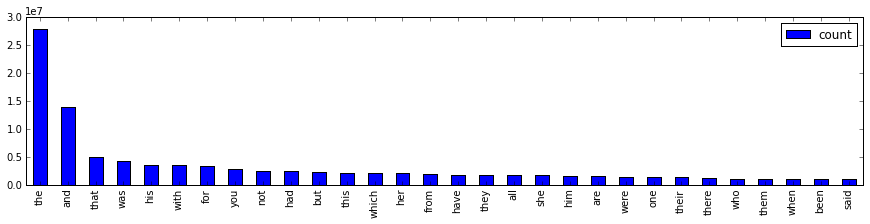

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline
start = datetime.datetime.now()

topWords = sqlContext.sql("SELECT * FROM wordcounts WHERE length(word) >=3 and count > 100000 order by count DESC LIMIT 30")
pandaData = topWords.toPandas()
pandaData.plot(kind='bar', figsize=(15,3))
plt.xticks(pandaData.index.values, pandaData['word'].values)
    
print 'Query took %s' % (datetime.datetime.now() - start)